In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix
from sklearn.cluster import KMeans



In [14]:
data = load_wine(as_frame=True)
data

{'data':      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
 0      14.23        1.71  2.43               15.6      127.0           2.80   
 1      13.20        1.78  2.14               11.2      100.0           2.65   
 2      13.16        2.36  2.67               18.6      101.0           2.80   
 3      14.37        1.95  2.50               16.8      113.0           3.85   
 4      13.24        2.59  2.87               21.0      118.0           2.80   
 ..       ...         ...   ...                ...        ...            ...   
 173    13.71        5.65  2.45               20.5       95.0           1.68   
 174    13.40        3.91  2.48               23.0      102.0           1.80   
 175    13.27        4.28  2.26               20.0      120.0           1.59   
 176    13.17        2.59  2.37               20.0      120.0           1.65   
 177    14.13        4.10  2.74               24.5       96.0           2.05   
 
      flavanoids  nonflavanoid

In [15]:
df = pd.DataFrame(data= np.c_[data['data'], data['target']], columns=data['feature_names'] + ['target'])

In [16]:
df.shape

(178, 14)

In [17]:
#Features: 0 - alcohol, 1 - malic_acid, 2 - ash
features = df[['alcohol', 'malic_acid', 'ash']]
features



,alcohol,malic_acid,ash
0,14.23,1.71,2.43
1,13.20,1.78,2.14
2,13.16,2.36,2.67
3,14.37,1.95,2.50
4,13.24,2.59,2.87
...,...,...,...
173,13.71,5.65,2.45
174,13.40,3.91,2.48
175,13.27,4.28,2.26
176,13.17,2.59,2.37


In [18]:
features.iloc[:,0]

0      14.23
1      13.20
2      13.16
3      14.37
4      13.24
       ...  
173    13.71
174    13.40
175    13.27
176    13.17
177    14.13
Name: alcohol, Length: 178, dtype: float64

In [19]:
#Split data
X = features
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
#KNN
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [21]:
def ConfusionMatrix(cm, labels=['alcohol','malic_acid', 'ash']):
    df = pd.DataFrame(data=cm, index=labels, columns=labels)
    df.index.name='TRUE'
    df.columns.name='PREDICTION'
    return df

In [22]:
cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
df = ConfusionMatrix(cm)


In [24]:
#tSNE
train = df[0:178]
train = np.asarray(train)


In [26]:
pca = PCA(n_components=3)
train = pca.fit_transform(train)

In [27]:
tsne = TSNE(n_components = 2, random_state=0, perplexity = 2)
tsne_res = tsne.fit_transform(train)

/Users/jenny.wade@schibsted.com/opt/miniconda3/envs/VisAn/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/jenny.wade@schibsted.com/opt/miniconda3/envs/VisAn/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


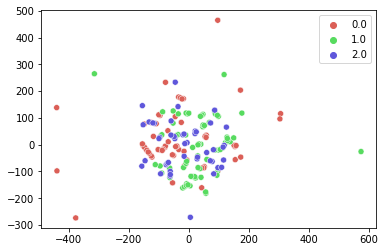

In [ ]:
sns.scatterplot(x = tsne_res[:,0], y = tsne_res[:,1], hue = labels, palette = sns.hls_palette(3), legend = 'full')
plt.show()

In [30]:
model = KMeans(n_clusters=3)
model.fit(x_test, y_test)
labels = model.predict(x_train)


In [31]:
labels

array([1, 2, 2, 0, 1, 0, 1, 2, 2, 1, 0, 0, 0, 1, 0, 0, 2, 1, 2, 0, 1, 1,
       0, 1, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 0,
       2, 2, 1, 2, 0, 0, 2, 1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 1, 0, 0, 2,
       2, 0, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 0, 0, 2, 0, 1, 0, 0, 1,
       2, 1, 1, 2, 0, 2, 2, 1, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 2,
       1, 2, 1, 2, 2, 2, 2, 1, 0, 0, 2, 0, 2, 2], dtype=int32)

ValueError: x and y must be the same size

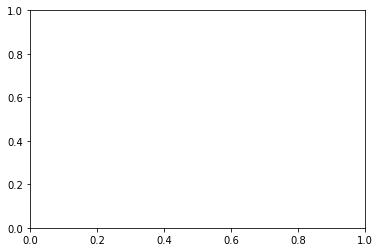

In [29]:

plt.scatter(y_pred, x_train)
plt.show()